In [39]:
from tensorflow import keras
from functions import sin_generator, split_coordinates
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# Generate coordinate points
train_data, train_targets = sin_generator(1000)

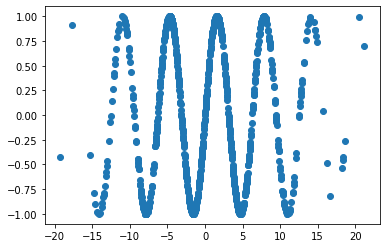

In [41]:
plt.scatter(train_data, train_targets)
plt.show()

In [42]:
def build_model():
    model = keras.Sequential([
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [43]:
model = build_model()
history = model.fit(train_data, train_targets,
              epochs=50, batch_size=128, validation_split = 0.2)

Epoch 1/50
7/7 [==============================] - 1s 30ms/step - loss: 2.0050 - mae: 1.1143 - val_loss: 0.8923 - val_mae: 0.7698
Epoch 2/50
7/7 [==============================] - 0s 9ms/step - loss: 0.8569 - mae: 0.7639 - val_loss: 0.5748 - val_mae: 0.6510
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.5827 - mae: 0.6766 - val_loss: 0.4908 - val_mae: 0.6140
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 0.5171 - mae: 0.6479 - val_loss: 0.4791 - val_mae: 0.6089
Epoch 5/50
7/7 [==============================] - 0s 10ms/step - loss: 0.5137 - mae: 0.6469 - val_loss: 0.4699 - val_mae: 0.6038
Epoch 6/50
7/7 [==============================] - 0s 9ms/step - loss: 0.5198 - mae: 0.6507 - val_loss: 0.4751 - val_mae: 0.6061
Epoch 7/50
7/7 [==============================] - 0s 9ms/step - loss: 0.5114 - mae: 0.6462 - val_loss: 0.4659 - val_mae: 0.6006
Epoch 8/50
7/7 [==============================] - 0s 8ms/step - loss: 0.5029 - mae: 0.6396 - val_loss:

In [44]:
test_data = np.linspace(-2 * np.pi, 2 * np.pi, num = 1000)
test_targets = np.sin(test_data)

In [45]:
model.evaluate(test_data, test_targets)

32/32 [==============================] - 0s 904us/step - loss: 0.4297 - mae: 0.5751


[0.42967960238456726, 0.5751495957374573]

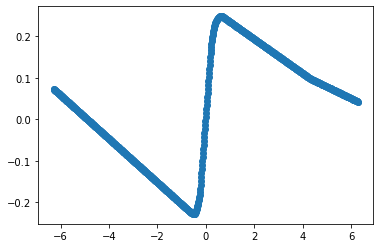

In [46]:
predicted = model.predict(test_data)
plt.scatter(test_data, predicted)
plt.show()

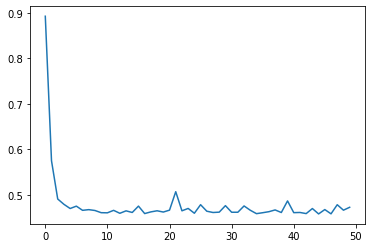

In [47]:
loss_hist = history.history["val_loss"]
plt.plot(loss_hist)